In [1]:
#########################################################
## 1 - Consultations en ligne
########################################################
import os
cwd = os.getcwd()
print(cwd)

/Users/lingani


In [2]:
import gspread
from oauth2client.service_account import ServiceAccountCredentials


# use creds to create a client to interact with the Google Drive API
scope = ['https://spreadsheets.google.com/feeds']
creds = ServiceAccountCredentials.from_json_keyfile_name('cocreation-f23bef2d618c.json', scope)
client = gspread.authorize(creds)

# Find a workbook by name and open the first sheet
# Make sure you use the right url here.

sheet = client.open_by_url('https://docs.google.com/spreadsheets/d/1TvjqPwKQJZhqT8TxD1iCO_-MvqeQ2eq3mECFQhfh6_c/edit?usp=sharing')
worksheet = sheet.get_worksheet(0)


# Extract and print all of the values
list_of_hashes = worksheet.get_all_records()
print(list_of_hashes)

[{u'Nom': u'OUEDRAOGO ', u"Souhaitez-vous \xeatre contacter par le comit\xe9 du PGO afin d'approfondir la r\xe9flexion sur la solution que vous proposez? ": u'Oui', u'Sexe': u'Homme', u'Quel est votre proposition de solution': u'Adopter une loi pour l\u2019instruction du BIM (Building Informations Modeling),la maquette Num\xe9rique  et SIG.En r\xe9sum\xe9 passer \xe0 la transition num\xe9rique afin de ne pas subir le poids dans les ann\xe9es \xe0 venir. ', u'Timestamp': u'9/7/2019 0:42:36', u'Pr\xe9cisez la Ville ou la Province': '', u'Si vous avez s\xe9lectionner \u201cAutre\u201c pr\xe9c\xe9demment, pr\xe9cis\xe9 le pays dans lequel vous r\xe9sidez': u'France', u'E-mail': u'orayanherman@gmail.com', u'Quel probl\xe8me souhaitez-vous r\xe9soudre?': u'La gestion et le meilleur suivi des projets (conception-construction-Exploitation-Maintenance)', u"Tranche d'age": u'26 ans \xe0 35 ans', u'T\xe9l\xe9phone (WhatsApp)': 22670583041, u'Pr\xe9nom': u'HERMAN ', u'Domaines concern\xe9s par vot

In [3]:
# Ici, nous allons faire quelques petites transformations pour plus de convenance
import pandas as pd
propositions = pd.DataFrame(list_of_hashes)
propositions.head() # de-commentez cette ligne pour afficher quelques lignes de données
# propositions.columns # de-commentez cette ligne pour afficher les noms des colonnes
# Renommez les noms des colonnes pour des questions pratiques de manipulation des données
propositions.rename(columns={u"Dans quelle région residez-vous?": 'region', 
                   u'Domaines concernés par votre proposition': 'domaine',
                  u'Nom': 'nom',
                  u'Prénom': 'prenom',
                  u'E-mail': 'email',
                  u'Précisez la Ville ou la Province': 'province/ville',
                  u'Quel est votre proposition de solution': 'solution',
                  u'Quel problème souhaitez-vous résoudre?': 'probleme',
                  u'Sexe':'sexe',
                  u'Si vous avez sélectionner “Autre“ précédemment, précisé le pays dans lequel vous résidez': 'pays',
                  u"Souhaitez-vous être contacter par le comité du PGO afin d'approfondir la réflexion sur la solution que vous proposez? ": 'etre_contacte',
                  u'Timestamp': 'timestamp',
                  u"Tranche d'age": 'age',
                  u'Téléphone (WhatsApp)': u'phone(whatsApp)'}, inplace=True)

# propositions.columns # de-commentez cette ligne pour afficher les nouvaux noms des colonnes


In [4]:
# créons un corpus de texte pour les problèmes et les solutions
texte_problemes = "".join(propositions["probleme"])
texte_solutions = "".join(propositions["solution"])


In [5]:
# Nettoyons les deux corpus pour y soustraire les ponctuations et les mots de liaison
import nltk

# transformons tous les textes en miniscule
texte_problemes = texte_problemes.lower()
texte_solutions = texte_solutions.lower()

tokens_problemes = [t for t in texte_problemes.split()]
for w in texte_problemes:
    w = w.strip('\'"?,.!_+=-')

tokens_solutions = [t for t in texte_solutions.split()]
for w in tokens_solutions:
    w = w.strip('\'"?,.!_+=-')

# suppression des mots de liason

from nltk.corpus import stopwords
sr = stopwords.words('french')
# trouver les stopwords français et le mettre dans sr
french = pd.read_csv("french.csv")
sr += list(french["words"])
sr = list(set(sr))

clean_tokens_solutions = tokens_solutions[:]
for token in tokens_solutions:
    if token in sr:
        clean_tokens_solutions.remove(token)

clean_tokens_problemes = tokens_problemes[:]
for token in tokens_problemes:
    if token in sr:
        clean_tokens_problemes.remove(token)


/Users/lingani/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:27: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
/Users/lingani/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:32: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


In [6]:
freq_problemes = nltk.FreqDist(clean_tokens_problemes)
freq_solutions = nltk.FreqDist(clean_tokens_solutions)


# for key,val in freq.items():
#    print(key.encode('utf-8') + ':' + str(val))
freq_problemes.plot(10, cumulative=False)
freq_solutions.plot(10, cumulative=False)

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

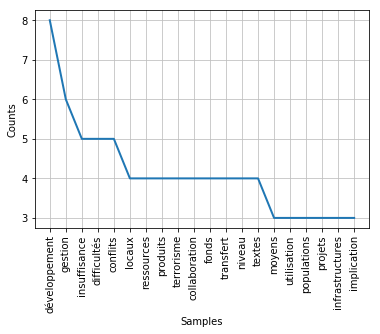

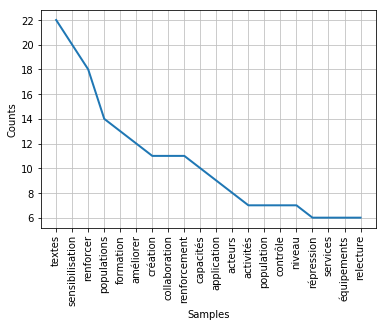

In [12]:
#########################################################
## 2 - Consultations regionales
########################################################
import sys
reload(sys)
sys.setdefaultencoding('utf-8')
import pandas as pd
from nltk.corpus import stopwords
sr = stopwords.words('french')
# trouver les stopwords français et le mettre dans sr
french = pd.read_csv("french.csv")
sr += list(french["words"])
sr = list(set(sr))

propositions = pd.read_csv("consultations_regions.csv")

texte_problemes = "".join(propositions["probleme"])
texte_solutions = "".join(propositions["solution"])

# Nettoyons les deux corpus pour y soustraire les ponctuations et les mots de liaison
import nltk

# transformons tous les textes en miniscule
texte_problemes = texte_problemes.lower()
texte_solutions = texte_solutions.lower()

tokens_problemes = [t for t in texte_problemes.split() if len(t)>3]
for w in texte_problemes:
    w = w.strip('\'"?,.!_+=-;')

tokens_solutions = [t for t in texte_solutions.split() if len(t)>3]
for w in tokens_solutions:
    w = w.strip('\'"?,.!_+=-;')

# suppression des mots de liason

from nltk.corpus import stopwords
sr = stopwords.words('french')
# trouver les stopwords français et le mettre dans sr
french = pd.read_csv("french.csv")
sr += list(french["words"])
sr = list(set(sr))
sr.append('à')

clean_tokens_problemes = tokens_problemes[:]
for token in tokens_problemes:
    if token in sr:
        clean_tokens_problemes.remove(token)

clean_tokens_solutions = tokens_solutions[:]
for token in tokens_solutions:
    if token in sr:
        clean_tokens_solutions.remove(token)
        
freq_problemes = nltk.FreqDist(clean_tokens_problemes)
freq_solutions = nltk.FreqDist(clean_tokens_solutions)


# for key,val in freq_problemes.items():
#    print(key.encode('utf-8') + ':' + str(val))
freq_problemes.plot(20, cumulative=False)
freq_solutions.plot(20, cumulative=False)

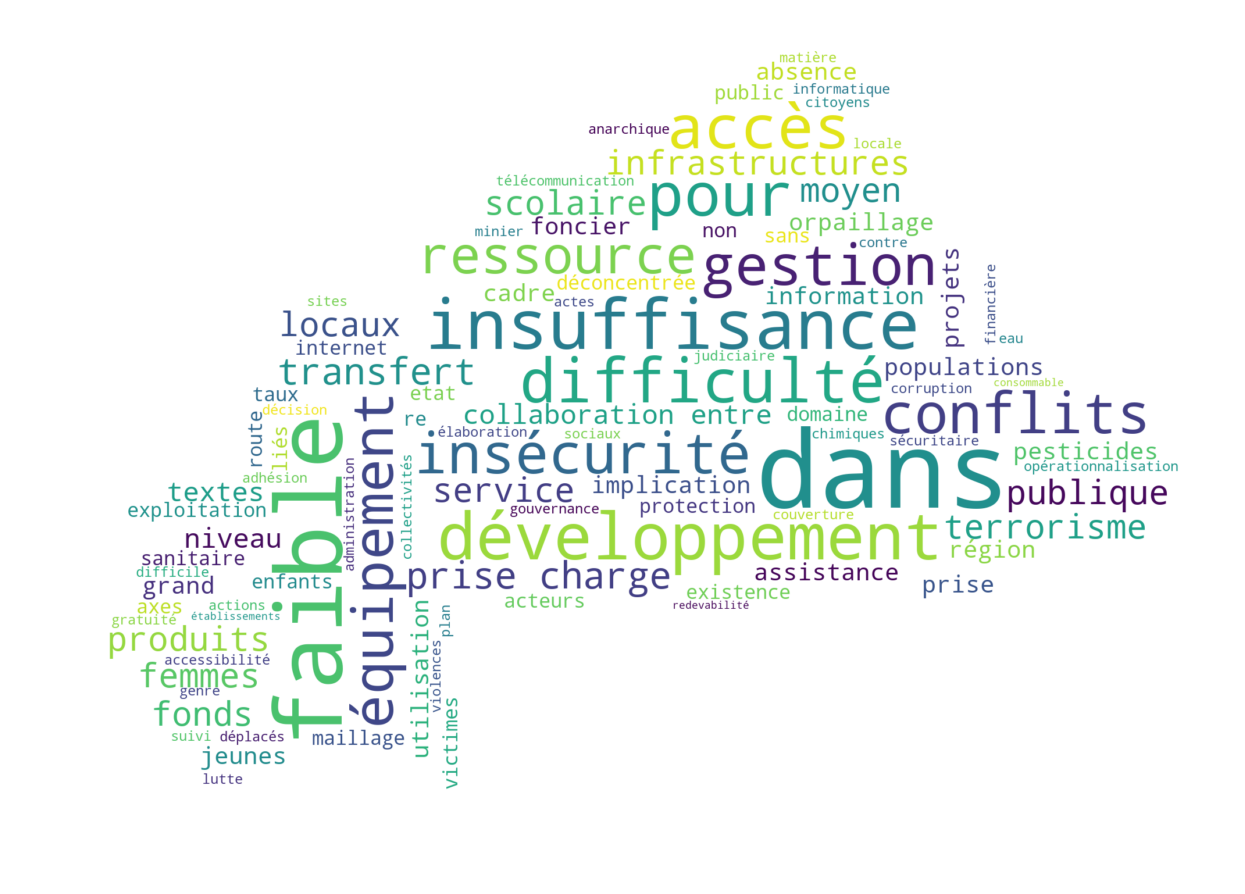

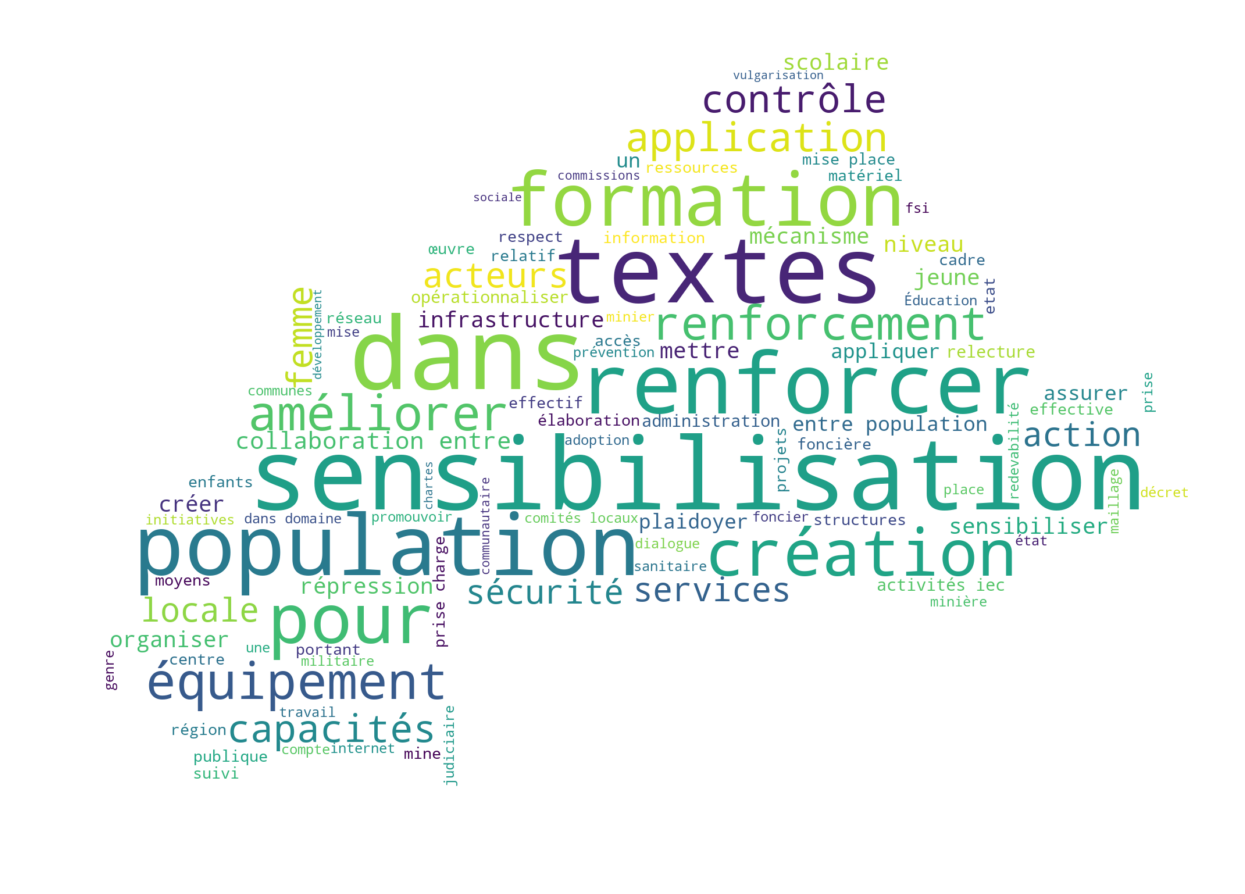

In [13]:
import os
import re
from PIL import Image
from os import path
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
def makeImage(text):
    alice_mask = np.array(Image.open("bf9.jpg"))

    wc = WordCloud(background_color="white", max_words=100, mask=alice_mask)
    # generate word cloud
    wc.generate(text)

    # show
    plt.figure(figsize=(15,15), dpi=100)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

    
texte_problemes = " ".join(tokens_problemes)
texte_solutions = " ".join(tokens_solutions)

makeImage(texte_problemes.decode("utf-8"))
makeImage(texte_solutions.decode("utf-8"))

In [11]:
sr

['je juste',
 u'soyez',
 'suivi',
 u'\xeates',
 u'e\xfbtes',
 u'aient',
 'peut',
 u'auraient',
 '\xc3\xa9t\xc3\xa9',
 u'aurions',
 'quelles',
 'font',
 u'auras',
 u'serait',
 u'le',
 u'serais',
 u'mais',
 u'la',
 u'eue',
 'cr\xc3\xa9er',
 u'tu',
 'quel',
 'd\xc3\xa9but',
 'aucuns',
 'charge',
 u'ayante',
 u'eux',
 u'aux',
 u'te',
 'mise',
 u'eus',
 u'ta',
 'non',
 u'aurais',
 'trop',
 u'aviez',
 u'de',
 u'ayantes',
 u'f\xfbtes',
 'mot',
 u'moi',
 u'sont',
 u'mon',
 'nomm\xc3\xa9s',
 u'ayant',
 'tandis',
 u'serez',
 u'du',
 '\xc3\xa9tat',
 u'nos',
 u'aurez',
 'comme',
 u'eussiez',
 u'qu',
 u'd',
 'faire',
 u'furent',
 u'f\xfbt',
 u'\xe9t\xe9e',
 'm\xc3\xaame',
 u'soient',
 'tr\xc3\xa8s',
 u'leur',
 u't',
 'car',
 'mettre',
 u'\xe9t\xe9s',
 u'seriez',
 u'en',
 u'ses',
 u'avons',
 'faites',
 u'l',
 'autre',
 'hors',
 "d'une",
 u'eu',
 u'et',
 u'sommes',
 u'tes',
 u'aurait',
 u'es',
 '-',
 'li\xc3\xa9',
 'ici',
 u'est',
 u'eurent',
 'essai',
 u'serions',
 'peu',
 'depuis',
 'vont',
 'seule

In [16]:
for t in sr:
    texte_problemes.replace(t, "")
    texte_solutions.replace(t, "")
    
texte_problemes.replace('dans', "")
texte_solutions.replace('dans', "")

'mettre documents disposition temps effectivit\xc3\xa9 journ\xc3\xa9es redevabilit\xc3\xa9; sorties d\xe2\x80\x99information sensibilisation  villages; am\xc3\xa9liorer collaboration entre d\xe2\x80\x99une part avec population d\xe2\x80\x99autres part; \xc3\x89quiper renforcer maillage territoire r\xc3\xa9gional cr\xc3\xa9ation d\xe2\x80\x99un fichier unique logement r\xc3\xa9alisation infrastructures d\xe2\x80\x99assainissement (caniveaux, latrines)exiger soci\xc3\xa9t\xc3\xa9s mini\xc3\xa8res respect textes mati\xc3\xa8re d\xc3\xa9veloppement local relecture foncier rural r\xc3\xa9soudre question l\xe2\x80\x99accaparement terres; appliquer d\xc3\xa9crets portant transfert comp\xc3\xa9tences ressources sensibiliser populations civisme fiscal veiller d\xc3\xa9senclavement chefs-lieux provinces r\xc3\xa9gion communes; effectivit\xc3\xa9 commissions fonci\xc3\xa8res villageoises; effectivit\xc3\xa9 commissions conciliations fonci\xc3\xa8res villageoises; cr\xc3\xa9ation services domaniau

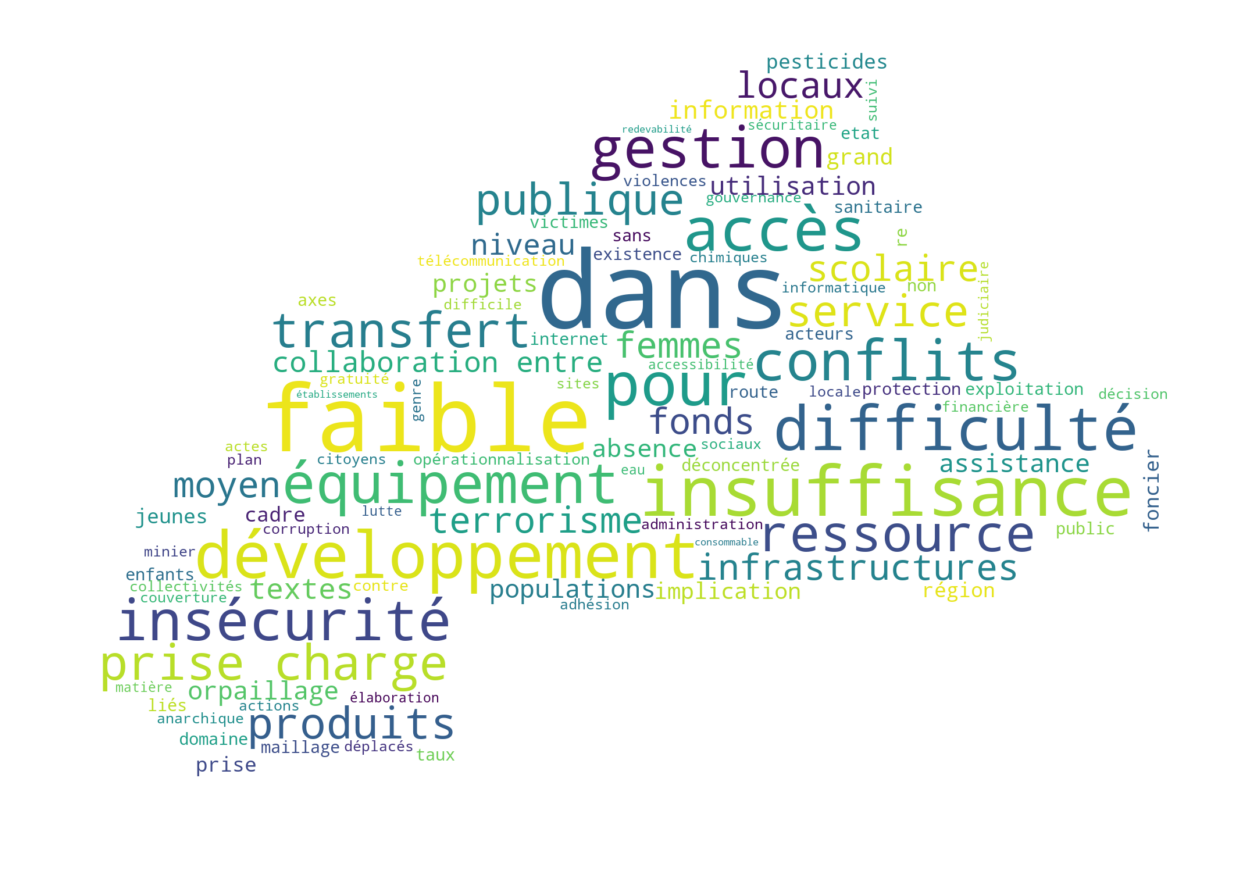

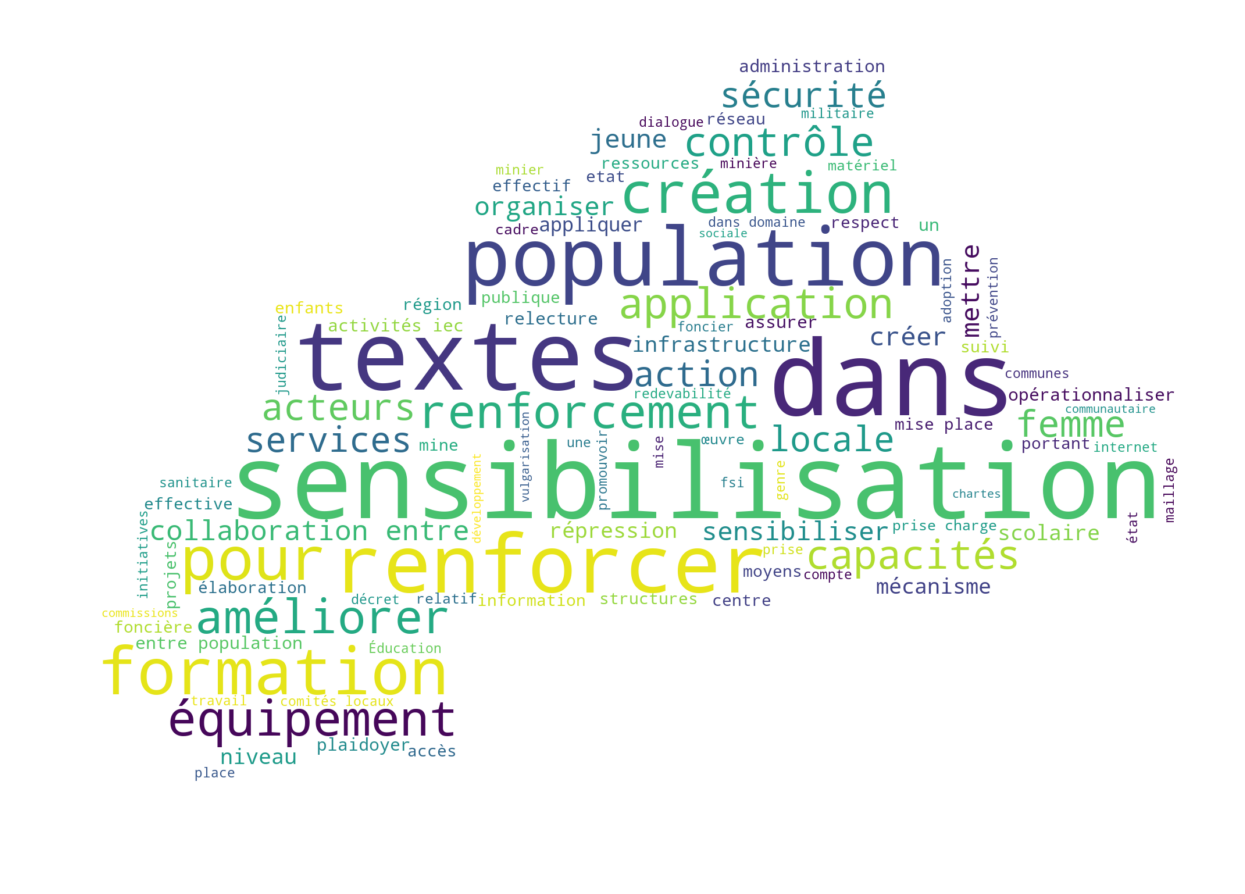

In [20]:
makeImage(texte_problemes.decode("utf-8"))
makeImage(texte_solutions.decode("utf-8"))

In [19]:
u'dans'

u'dans'